# Логистическая регрессия

__Логистическая регрессия(Logistic regression)__ - метод построения линейного классификатора, позволяющий оценивать апостериорные(вычисляемые) вероятности принадлежности объектов к классам.

- Несмотря на наличие слова "регрессия" в названии, логистическая регрессия на самом деле является широко спользуемым бинарным классификатором(т.е. вектор целей может принимать только два значения). 

__В методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.__


$Присказка$

- Предположим, что есть абонент,который выбирает купить или не купить услугу. Он покупает услугу, если "польза" от услуги больше нуля. Запишем:$$y^*_i=x^`_iw+\xi_i$$
- Модель скрытой переменной, где $y^*_i$ - ненаблюдаемая переменная, а $\xi_i$ - ошибка, имеющая распределение F. 
$$y_i=1,   если   y^*_i>=0$$
$$y_i=0,      otherwise$$
Тогда:
$$\text P\left(y_i = 1 \mid x_i\right) = \text P\left(y^*_i >= 0 \mid x_i\right) = \text P\left(x^`_iw+\xi_i >= 0 \mid x_i\right) = \text P\left(\xi_i >= -x^`_iw \mid x_i\right) = 1 - F(-x^`_iw) = F(x^`_iw) $$
- Предположим, распределение ошибки - логистическое. То есть:
$$F(\xi)=\frac{1}{1 + \exp^{-\xi}}$$
- Отсюда получаем логистическую регрессию.

### Линейный классификатор

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 
Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*.

<img src="./logit.png">



В логистической регрессии линейная модель (например  $\beta_0$+$\beta_1$x) включается в логистическую(так называемую сигмоидальную) функцию $\frac{1}{1 + \exp^{-\textbf{z}}}$ таким образом, что:
$$\text P\left(y_i = 1 \mid \text{X}\right) = \frac{1}{1 + \exp^{-(\beta_0+\beta_1 x)}} $$
где $\text P\left(y_i = 1 \mid \text{X}\right)$ - вероятность, что целевое значение i-го наблюдения $y_i$ является классом 1;
$Х$ - тренировочные данные; $\beta_0$ и $\beta_1$ - параметры, которые необходимо заучить; $e$ - эйлерово число. Эффект логистической функции заключается в ограничении значения результата функции диапазоном между 0 и 1, чтобы его можно было интепретировать как вероятность. Если $\text P\left(y_i = 1 \mid \text{X}\right)$ больше 0.5, то предсказывается класс 1, в противном случае - класс 0.

### Логистическая регрессия как линейный классификатор

- Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения вектора признаков $\vec{x_i}$ к классу "+":

Итак, мы хотим прогнозировать вероятность $p_+ \in [0,1]$, а пока умеем строить линейный прогноз с помощью МНК: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. Каким образом преобразовать полученное значение в вероятность, пределы которой – [0, 1]? Очевидно, для этого нужна некоторая функция $f: \mathbb{R} \rightarrow [0,1].$ В модели логистической регрессии для этого берется конкретная функция: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$.

Обозначим $P(X)$ вероятностью происходящего события $X$. Тогда отношение вероятностей $OR(X)$ определяется из $\frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но в то время как $P(X)$ находится в пределах от 0 до 1, $OR(X)$ находится в пределах от 0 до $\infty$.

Если вычислить логарифм $OR(X)$ (то есть называется логарифм шансов, или логарифм отношения вероятностей), то легко заметить, что $\log{OR(X)} \in \mathbb{R}$. Его то мы и будем прогнозировать с помощью МНК.

Посмотрим, как логистическая регрессия будет делать прогноз $p_+ = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ (пока считаем, что веса $\textbf{w}$ мы как-то получили (т.е. обучили модель), далее разберемся, как именно). 

**Шаг 1.** Вычислить значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (уравнение $\textbf{w}^\text{T}\textbf{x} = 0$ задает гиперплоскость, разделяющую примеры на 2 класса);


**Шаг 2.** Вычислить логарифм отношения шансов: $ \log(OR_{+}) =  \textbf{w}^\text{T}\textbf{x}$.

**Шаг 3.** Имея прогноз шансов на отнесение к классу "+" – $OR_{+}$, вычислить $p_{+}$ с помощью простой зависимости:

$$\Large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$


В правой части мы получили как раз сигмоид-функцию.

Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:

$$\Large p_+(x_i) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$


In [9]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Хотим попробовать применить ту же модель линейной регрессии, но для задачи классификации. То есть
$$\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik} = y_i,$$
где $X_i = (x_{i1}, \ldots, x_{ik})$ -- строка с данными, $y_i\in\{0, 1\}$, $\beta_0, \ldots, \beta_k$ -- неизвестные коэффициенты.
Проблема в том, что слева стоит непрерывная функция по $x$, а справа -- дискретная переменная. Кроме того, при больших значениях $x$ функция слева будет гарантированно давать большие значения. Так что применить модель прямо в таком виде -- плохая идея.

Введём логистическую функцию (сигмоид) $\sigma(x)=\frac{1}{1+e^{-x}}$.

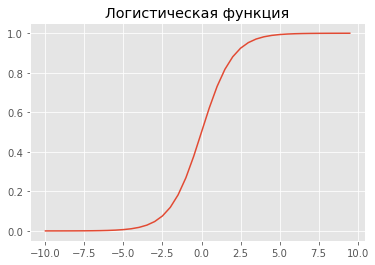

In [12]:
x=np.array(np.arange(-10,10,0.5))
y=1./(1+np.exp(-x))
plt.plot(x,y)
plt.title(u'Логистическая функция');

Заметим, что $\sigma: \mathbb{R}\rightarrow (0, 1)$.

Применим к левой части логистическую функцию и будем решать задачу в виде
$$\sigma\left(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}\right) = y_i.$$

Теперь слева у нас всегда будут получаться значения из $(0, 1)$, и это можно интерпретировать как вероятности принадлежности классу: если меньше 0.5, то класс 0, иначе -- класс 1.

Но теперь у нас пропадает аналитическое решение, которое было для линейной регрессии. Теперь придётся решать задачу оптимизации. Градиентный спуск (или другие методы) в помощь!

Логистическая модель в sklearn реализована в классе ```LogisticRegression``` библиотеки ```linear_model```.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'
    )

Натренировать логистическую регрессию

In [26]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#Загрузим данные только с двумя классами
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

#Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Создать объект логистической регрессии
logistic_regression = LogisticRegression(random_state=0)

#Натренировать модель
model = logistic_regression.fit(features_standardized,target)

In [27]:
#Создать новое наблюдение
new_observation = [[.5, .5, .5, .5]]

In [28]:
#Предсказать класс
model.predict(new_observation)

array([1])

В этом примере наше наблюдение было предсказано как класс 1. Кроме того, мы можем увидеть вероятность принадлежности наблюдения к каждому классу:

In [29]:
model.predict_proba(new_observation)

array([[0.39173187, 0.60826813]])

### Принцип максимального правдоподобия и логистическая регрессия
Теперь посмотрим, как из принципа максимального правдоподобия получается оптимизационная задача, которую решает логистическая регрессия, а именно, – минимизация *логистической* функции потерь. 
Только что мы увидели, что логистическая регрессия моделирует вероятность отнесения примера к классу "+" как 

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тогда для класса "-" аналогичная вероятность:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Оба этих выражения можно  объединить в одно:

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ называется *отступом* (*margin*) классификации на объекте $\textbf{x}_\text{i}$ (не путать с зазором (тоже margin), про который чаще всего говорят в контексте SVM). Если он неотрицателен, модель не ошибается на объекте $\textbf{x}_\text{i}$, если же отрицателен – значит, класс для $\textbf{x}_\text{i}$  спрогнозирован неправильно. 
Заметим, что отступ определен для объектов именно обучающей выборки, для которых известны реальные метки целевого класса $y_i$.
 

Теперь распишем правдоподобие выборки, а именно, вероятность наблюдать данный вектор $\textbf{y}$ у выборки $\textbf X$. Делаем сильное предположение: объекты приходят независимо, из одного распределения (*i.i.d.*). Тогда

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

где $\ell$ – длина выборки $\textbf X$ (число строк).

Как водится, возьмем логарифм данного выражения (сумму оптимизировать намного проще, чем произведение):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

То есть в данном случае принцип максимизации правдоподобия приводит к минимизации выражения 

$$\Large \mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Это *логистическая* функция потерь, просуммированная по всем объектам обучающей выборки.
